In [1]:
cd Sum/

/home/tanner/ACME/One/Profiling/Sum


In [45]:
from cysum import cysum as csum
from pysum import pysum as psum
insum = in_line_cysum

In [40]:
cimport cython

SyntaxError: invalid syntax (<ipython-input-40-7b66d5a1006f>, line 1)

In [3]:
%load_ext Cython

In [43]:
%%cython
cimport cython
@cython.boundscheck(False)
@cython.wraparound(False)
def in_line_cysum(double[:] A):
    cdef double total = 0
    cdef int i
    for i in xrange(len(A)):
        total += A[i]
    return total

In [5]:
A = np.random.rand(100000000)

In [44]:
psum = pysum.pysum
cysum = cysum.cysum
insum = in_line_cysum

AttributeError: 'builtin_function_or_method' object has no attribute 'cysum'

In [7]:
%time psum(A)

CPU times: user 14.5 s, sys: 524 ms, total: 15 s
Wall time: 14.9 s


49998797.823796265

In [8]:
%time cysum(A)

CPU times: user 100 ms, sys: 0 ns, total: 100 ms
Wall time: 97.5 ms


49998797.823796265

In [9]:
%time insum(A)

CPU times: user 92 ms, sys: 0 ns, total: 92 ms
Wall time: 92.6 ms


49998797.823796265

In [10]:
%time sum(A)

CPU times: user 8.11 s, sys: 0 ns, total: 8.11 s
Wall time: 8.11 s


49998797.823796265

In [11]:
%time np.sum(A)

CPU times: user 64 ms, sys: 0 ns, total: 64 ms
Wall time: 63.6 ms


49998797.823788293

In [12]:
from numba import jit

@jit
def numba_sum(A):
    total = 0
    for i in range(len(A)):
        total += A[i]
    return total


In [13]:
nsum = numba_sum

In [19]:
%time nsum(A)

CPU times: user 128 ms, sys: 0 ns, total: 128 ms
Wall time: 130 ms


49998797.823796265

In [20]:
import time

10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
Python: 2.75242400169
Cython: 0.0176389217377
In-line Cython: 0.0173389911652
Numba: 0.0174670219421


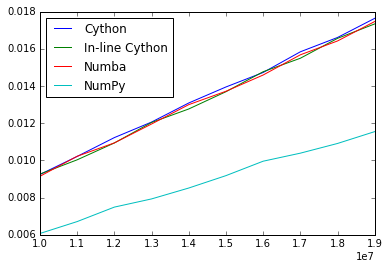

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
P = []
C = []
I = []
N = []
U = []
my_list = np.arange(1e7,2e7,1e6).astype("int")
for i in my_list:
    A = np.random.rand(i)
    
    before = time.time()
    psum(A)
    after = time.time()
    P.append(after - before)
    
    before = time.time()
    cysum(A)
    after = time.time()
    C.append(after - before)
    
    before = time.time()
    insum(A)
    after = time.time()
    I.append(after - before)
    
    before = time.time()
    nsum(A)
    after = time.time()
    N.append(after - before)
    
    before = time.time()
    np.sum(A)
    after = time.time()
    U.append(after - before)
    
    print i
    
print "Python: " + str(P[-1])
print "Cython: " + str(C[-1])
print "In-line Cython: " + str(I[-1])
print "Numba: " + str(N[-1])
 
x = my_list
#plt.semilogy(x,P,label="Python")
plt.plot(x,C,label="Cython")
plt.plot(x,I,label="In-line Cython")
plt.plot(x,N,label="Numba")
plt.plot(x,U,label="NumPy")
plt.legend(loc="upper left")
plt.show()

In [22]:
1e7

10000000.0

In [23]:
1e7

10000000.0